# ATLAS Higgs Boson Challenge

In [1]:
import pandas as pd
import os
from typing import Final
from collections.abc import Callable
import matplotlib.pyplot as plt
from config import data_raw_folder, data_processed_folder
plt.rcParams['figure.figsize'] = (20, 10)

In [5]:
dataset_collection_name = "ATLAS"
source_folder = os.path.join(data_raw_folder, "ATLAS Higgs Boson Challenge")
target_folder = data_processed_folder

In [22]:
def prepare_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    cols = df.columns
    cols = [col for col in cols if col not in ["Weight", "KaggleSet", "KaggleWeight"]]
    df = df[cols]
    df["Label"] = df["Label"].transform(lambda x: 1 if x == "s" else 0)
    return df

In [23]:
df = pd.read_csv(os.path.join(source_folder, "atlas-higgs-challenge-2014-v2.csv"))
df_train = df[df["KaggleSet"] == "t"]
df_train = prepare_df(df_train)
df_test = df[df["KaggleSet"].isin(["b", "V"])]
df_test = prepare_df(df_test)
del df

In [41]:
pos, neg = df_test.groupby("Label")["EventId"].count()
print(f"occupancy rate = {neg/pos}")

occupancy rate = 0.5157256536566881


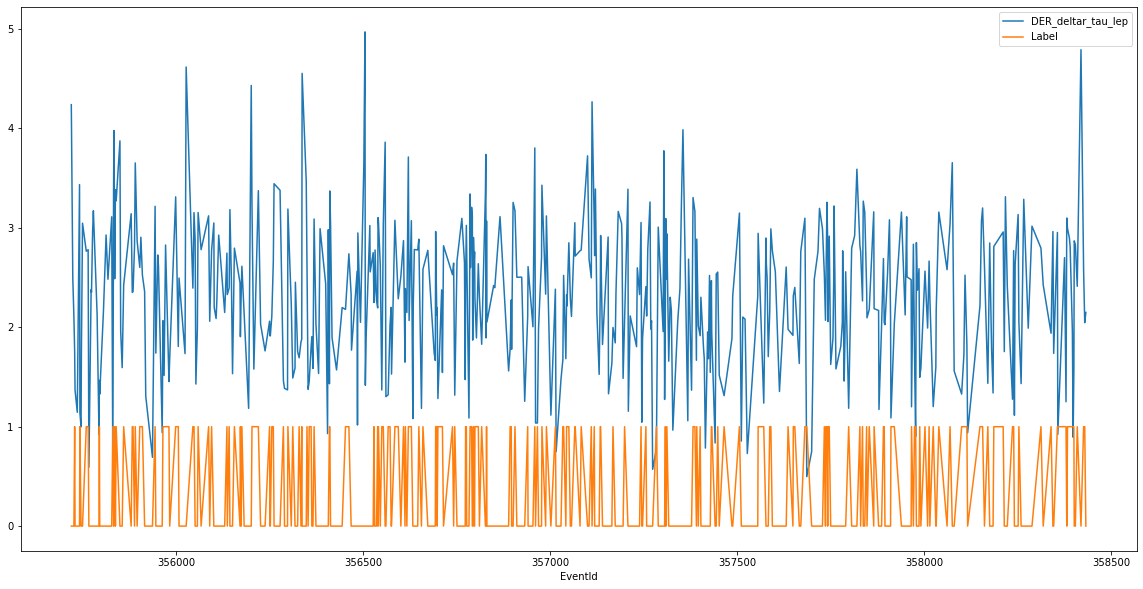

In [34]:
df_test.iloc[1000:1500].plot(x="EventId", y=["DER_deltar_tau_lep", "Label"])
plt.show()